
# Exercises: Clustering

In [1]:
# Import necessary libraries here
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

## Wine dataset
This exercise is base on the wine dataset included in the sklearn.datasets module.
In the Jupyter tab explore the 'wine' object. It stores all kinds of data about the wine dataset. You will probably need data, feature_names, target and target_names. In the following cell the wine dataset is loaded.

 ### Data preperation

In [2]:
# The dataset is loaded for you.
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

a. It is often a good idea to normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. One of the most used normalization techniques is transforming your input data to a set with a mean of 0 and a standard deviation of 1. (calculating Z-scores).\
In sklearn this can be done with the StandardScaler.\
Create a new dataframe with the normalized data.


In [4]:
from sklearn.preprocessing import StandardScaler

# 1. Initialiseer de scaler voor Z-score normalisatie (µ=0, σ=1)
scaler = StandardScaler()  # past per feature centering en scaling toe

# 2. Pas fit_transform toe op de originele feature-matrix X
X_scaled = scaler.fit_transform(X)  # geeft een numpy array terug

# 3. Zet het resultaat om in een nieuwe DataFrame met dezelfde kolomnamen
X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

# 4. Bekijk de eerste rijen van de genormaliseerde DataFrame
print(X_normalized.head())  # toont mean ~0 en std ~1 per kolom

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

### Model selection and hyperparameter selection
 a.  Fit a K-means with 3 clusters on this set. Use random_state=42 to ensure the same results every time.\



In [6]:
from sklearn.cluster import KMeans


# a. Fit een K-Means met 3 clusters en random_state=42
kmeans = KMeans(n_clusters=3, random_state=42)   # initialiseer model  
kmeans.fit(X_normalized)                         # pas K-Means toe op genormaliseerde data

KMeans(n_clusters=3, random_state=42)

b. Derive the model and predict the clusters.

In [7]:
# b. Voorspel de clusterlabels voor alle observaties
clusters = kmeans.predict(X_normalized)          # predict geeft per monster de cluster-toewijzing
print(clusters[:10])                             # voorbeeld: eerste 10 voorspellingen

[2 2 2 2 2 2 2 2 2 2]


c. Instead of performing the Scaler seperatly, use the pipeline module from sklearn. A Pipeline is a sequence of data tranformers (in this case the StandardScaler() with an optional final predictor (in this case KMeans). You already used pipeline to transform a polynominal regression to a linear regression.  \
Create a pipeline that first executes the StandardScaler() and uses the output to apply Kmeans and the KMeans.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# c. Maak een pipeline die eerst schaalt en dan clustert
pipeline = Pipeline([
    ('scaler', StandardScaler()),                            # Z-score normalisatie
    ('kmeans', KMeans(n_clusters=3, random_state=42))        # K-Means met 3 clusters
])
pipeline.fit(X)                                              # fit op originele X (scaler wordt automatisch toegepast)
clusters = pipeline.predict(X)                              # cluster-toewijzing per observatie


d. Create a dataframe with the resulting 'clusters' and the original 'wine classes'.\
e. Can you see a pattern when comparing the clusters with the original wine classes?

In [9]:
# d. DataFrame van voorspelde clusters en echte labels
df_clusters = pd.DataFrame({
    'cluster': clusters,                                    # door kmeans voorspelde cluster
    'true_class': y                                         # originele wijnklassen
})
print(df_clusters.head())
print(pd.crosstab(df_clusters['true_class'], df_clusters['cluster']))

   cluster  true_class
0        2           0
1        2           0
2        2           0
3        2           0
4        2           0
cluster      0   1   2
true_class            
0            0   0  59
1           65   3   3
2            0  48   0


e. Visualize the clusters by plotting the first two features. Color the points by cluster.\

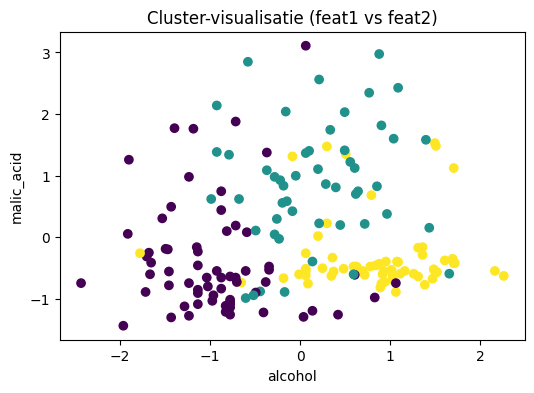

In [10]:
# e. Visualiseer de clusters op basis van de eerste twee genormaliseerde features
X_norm = pipeline.named_steps['scaler'].transform(X)        # genormaliseerde features als numpy array
plt.figure(figsize=(6, 4))
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=clusters)         # feature1 vs feature2, kleur = cluster
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Cluster-visualisatie (feat1 vs feat2)')
plt.show()

f. Now do the same for every successive feature combination. ex. feature1 vs feature2, feature2 vs feature3, feature3 vs feature4, etc.\
Do this by using a 'for' loop and make sure it is reusable for other datasets.\
Tips:
- Create a figure with subplots that has n-1 axes (n being the number of features)
- loop n-1 times
    - Create a scatter-plot on the i-th axe within the loop, and plot feature i and i+1
g. Wich combination of features seperates the features in the best way?

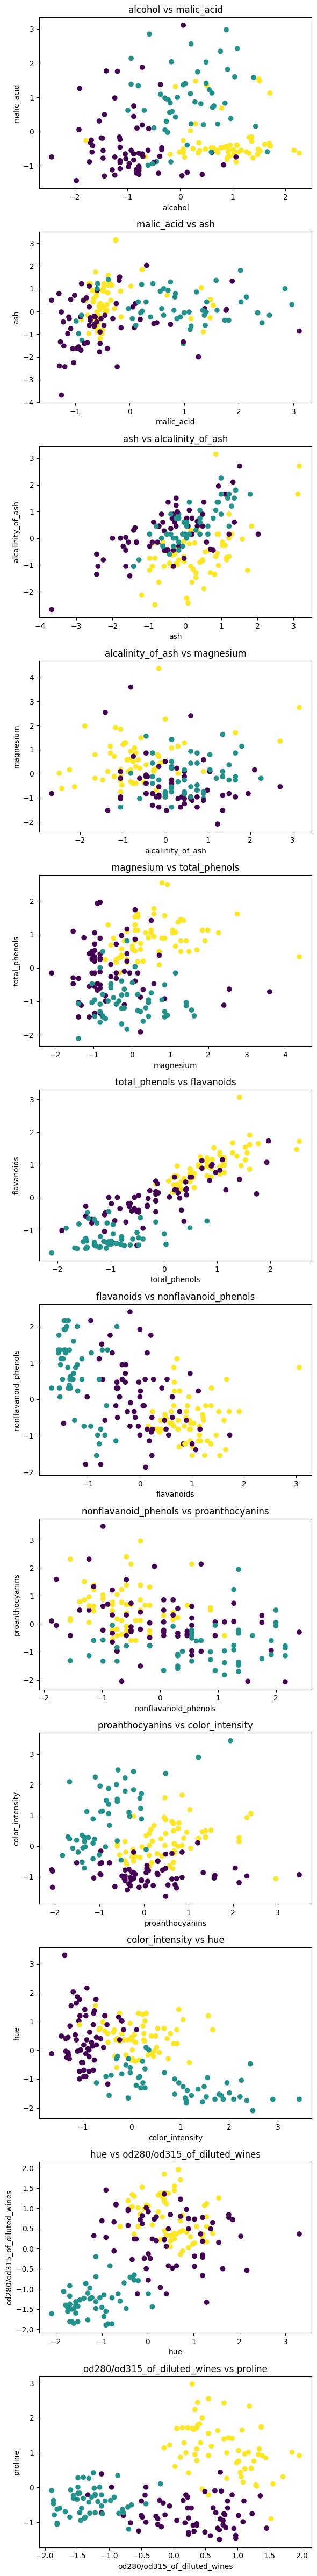

In [11]:
# f. Loop over alle opeenvolgende feature-paren en plot in subplots
n_feats = X.shape[1]
fig, axes = plt.subplots(n_feats-1, 1, figsize=(6, 4*(n_feats-1)))
for i, ax in enumerate(axes):
    ax.scatter(X_norm[:, i], X_norm[:, i+1], c=clusters)   # scatter per feature-paar
    ax.set_xlabel(X.columns[i])
    ax.set_ylabel(X.columns[i+1])
    ax.set_title(f'{X.columns[i]} vs {X.columns[i+1]}')
plt.tight_layout()
plt.show()

# Customer segmentation

This exercise is based on https://www.kaggle.com/code/pablomgomez21/k-means-clustering-practice/notebook but the questions are adjusted to the workflow we use.


## Data preperation
a. Study ``Cust_segmentation.csv`` and import the data with pandas.\
b. Remove 'Adress' as it is Categorical data. Customer_Id should also be removed because it is not useful for clustering.\


In [14]:
data = pd.read_csv("../Datasets/Cust_Segmentation.csv", sep=",")

data_clean = data.drop(columns=["Address", "Customer Id"], axis=1)

# Controleer resultaat
print(data_clean.head())                                   # eerste vijf rijen
print(f"Aantal kolommen na schoonmaak: {data_clean.shape[1]}")  

   Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted  \
0   41    2               6      19      0.124       1.073        0.0   
1   47    1              26     100      4.582       8.218        0.0   
2   33    2              10      57      6.111       5.802        1.0   
3   29    2               4      19      0.681       0.516        0.0   
4   47    1              31     253      9.308       8.908        0.0   

   DebtIncomeRatio  
0              6.3  
1             12.8  
2             20.9  
3              6.3  
4              7.2  
Aantal kolommen na schoonmaak: 8


### Model and hyperparameter selection

c. Fit a K-means with 3 clusters and n_init=12 on this set. Use random_state=42 to ensure the same results every time. Make sure the data is normalized before fitting.\
Mind that, even if you do this correctly, you will get an error because of NaN values. Investigate the problem and take a proper action.\


In [15]:
# 1. Onderzoek of er nog NaN’s in zitten en verwijder ze
print(data_clean.isnull().sum())          # aantal missende waarden per kolom
data_nona = data_clean.dropna()           # drop alle rijen met ten minste één NaN

# 2. Z-score normalisatie (µ=0, σ=1)
scaler = StandardScaler()                 
X_norm = scaler.fit_transform(data_nona)  # numpy-array met genormaliseerde features

# 3. Fit K-Means met 3 clusters, n_init=12, random_state=42
kmeans = KMeans(
    n_clusters=3,     # drie segmenten
    n_init=12,        # aantal initialisaties
    random_state=42   # zorgt voor reproduceerbaarheid
)
kmeans.fit(X_norm)                        # model afleiden
clusters = kmeans.labels_                 # clusterlabels per klant

print("Eerste 10 cluster-toewijzingen:", clusters[:10])

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64
Eerste 10 cluster-toewijzingen: [2 1 0 2 1 2 2 1 0 2]


d. Display the centers of the clusters. Tip: Use ``named_steps['kmeans']`` to access the Kmeans-model object within the pipeline\
e. The problem here is that you are showing the means of the normalized dataset. Perform an ``inverse_transform()`` on the ``cluster_centers_``. ``inverse_transform()`` is availaible on the ``standardscaler`` step in  the pipeline.


In [16]:
# d. Toon de centra in de genormaliseerde ruimte
kmeans_model = pipeline.named_steps['kmeans']           # pak het KMeans-object uit de pipeline
centers_scaled = kmeans_model.cluster_centers_          # centra in geschaalde (µ=0, σ=1) ruimte
centers_scaled_df = pd.DataFrame(
    centers_scaled,
    columns=X.columns                                   # behoud kolomnamen voor duidelijkheid
)
print("Genormaliseerde cluster-centra:")
print(centers_scaled_df)

# e. Zet de centra terug naar de oorspronkelijke schaal
scaler = pipeline.named_steps['scaler']                 # pak de scaler uit de pipeline
centers_original = scaler.inverse_transform(centers_scaled)  # inverse_transform herstelt originele magnitudes
centers_original_df = pd.DataFrame(
    centers_original,
    columns=X.columns                                   # dezelfde kolomnamen
)
print("\nCluster-centra in originele schaal:")
print(centers_original_df)

Genormaliseerde cluster-centra:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0 -0.926072   -0.394042 -0.494517           0.170602  -0.491712   
1  0.164907    0.871547  0.186898           0.524367  -0.075473   
2  0.835232   -0.303810  0.364706          -0.610191   0.577587   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0      -0.075983    0.020813             -0.033534         0.058266   
1      -0.979330   -1.215248              0.726064        -0.779706   
2       0.885237    0.977820             -0.562090         0.580287   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.901914  0.461804                      0.270764 -0.753846  
1         0.941539 -1.164789                     -1.292412 -0.407088  
2         0.171063  0.473984                      0.779247  1.125185  

Cluster-centra in originele schaal:
     alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
0  12.250923    1.897385

f. Finally visualize the clusters by plotting 'age' and 'income'. Color the points by cluster.\

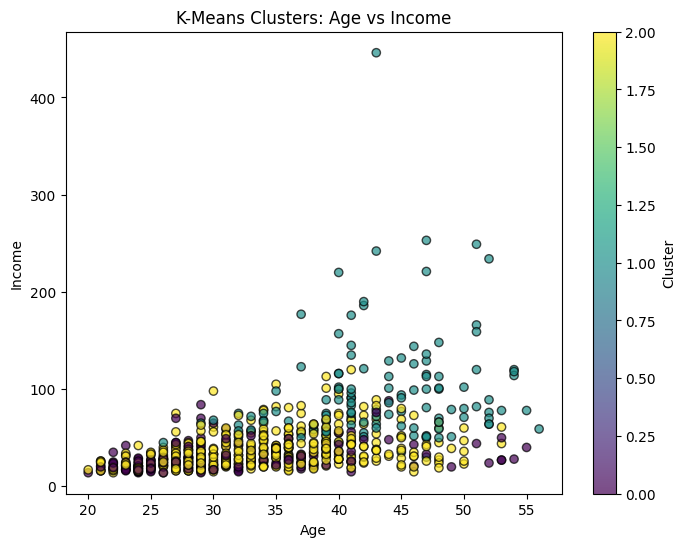

In [17]:
# f. Visualiseer clusters op basis van 'Age' en 'Income'
plt.figure(figsize=(8, 6))                             # figuurgrootte instellen
plt.scatter(
    data_nona['Age'],                                  # leeftijd op x-as
    data_nona['Income'],                               # inkomen op y-as
    c=clusters,                                        # kleur per clusterlabel
    cmap='viridis',                                    # kleurenmap voor onderscheid
    edgecolor='k',                                     # zwarte rand voor punten
    alpha=0.7                                          # iets doorzichtig maken
)
plt.xlabel('Age')                                      # x-as label
plt.ylabel('Income')                                   # y-as label
plt.title('K-Means Clusters: Age vs Income')          # titel van de plot
plt.colorbar(label='Cluster')                         # kleurlegenda tonen
plt.show()     